Import libraries

In [559]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

Read Dataset

In [560]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


Check NULL values

In [561]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [562]:
df["person_emp_length"].value_counts()

person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [563]:
df["loan_int_rate"].value_counts()

loan_int_rate
7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
        ... 
21.64      1
20.48      1
17.46      1
21.14      1
20.53      1
Name: count, Length: 348, dtype: int64

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [565]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Fill missing values by mean

In [566]:
df1= df.copy()

In [567]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [568]:
df1["person_emp_length"].fillna(df1["person_emp_length"].mean(),inplace=True)
df1["loan_int_rate"].fillna(df1["loan_int_rate"].mean(),inplace=True)

In [569]:
df1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Handling the Outliers


In [570]:
a=df1.columns[df1.dtypes!=object]
a

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

person_age


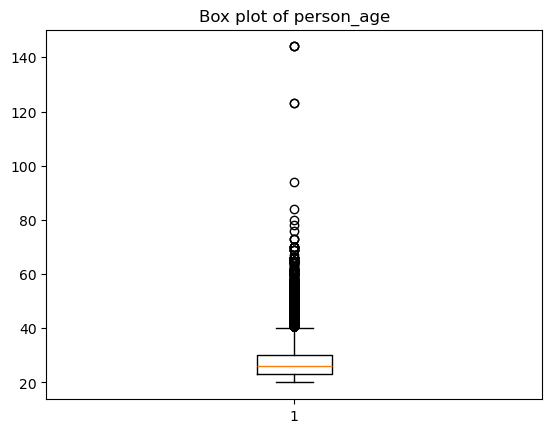

person_income


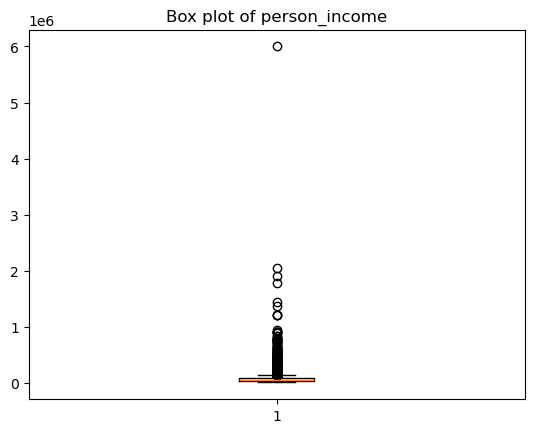

person_emp_length


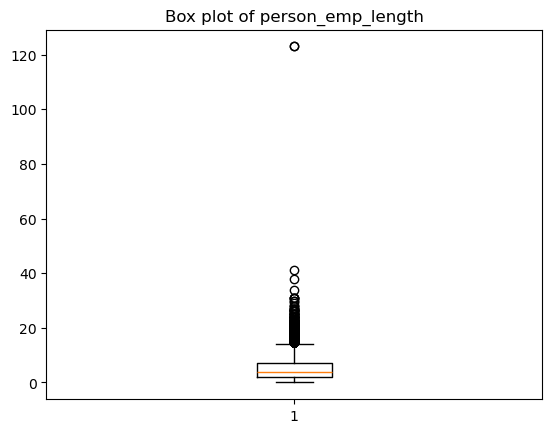

loan_amnt


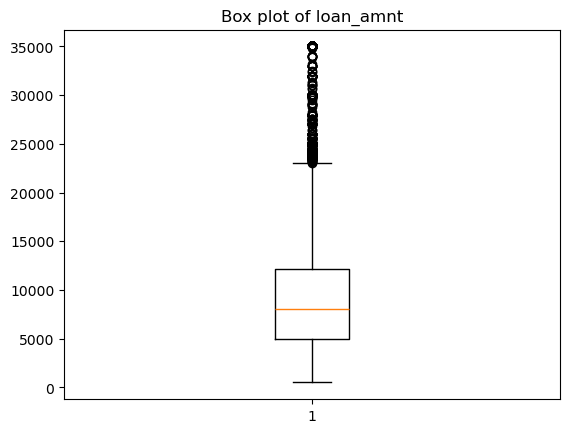

loan_int_rate


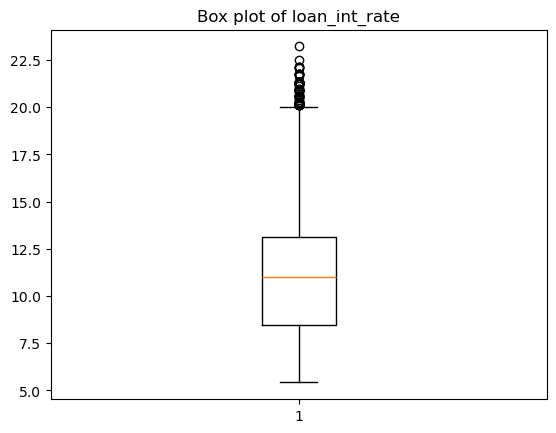

loan_status


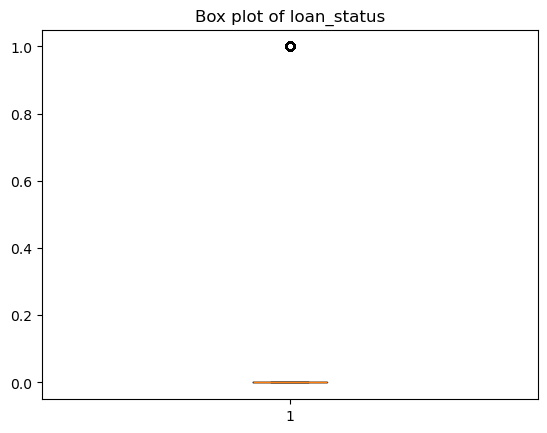

loan_percent_income


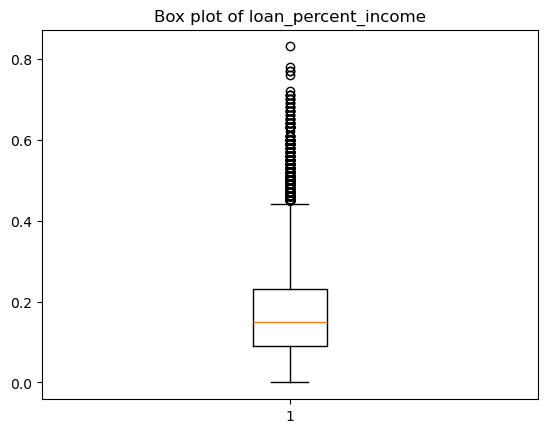

cb_person_cred_hist_length


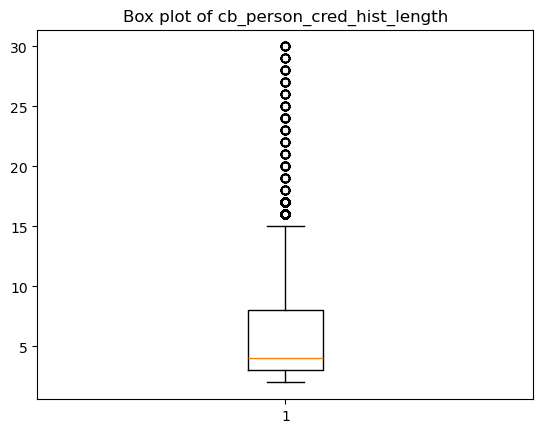

In [571]:
for i in df1.columns[df1.dtypes!=object]:
    print(i)
    plt.boxplot(df1[i])
    plt.title(f'Box plot of {i}')
    plt.show()


In [572]:
# for i in df1.columns[df1.dtypes!=object]:
#     print(i)
#     sns.boxplot(df1[i])
#     plt.title(f'Box plot of Value {i}')
#     plt.show()


In [573]:
df2=df1.copy()
df2.tail(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


Removing outliers

In [574]:
q = df2['person_age'].quantile(0.99)
data_cleaned = df2[df2['person_age']<q]

q=data_cleaned["person_income"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['person_income']<q]

q=data_cleaned["person_emp_length"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['person_emp_length']<q]

data_cleaned.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


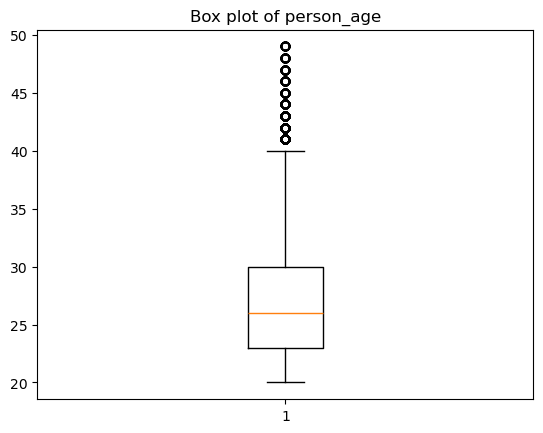

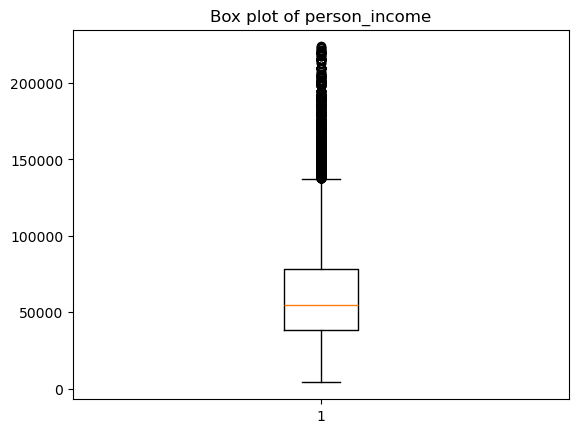

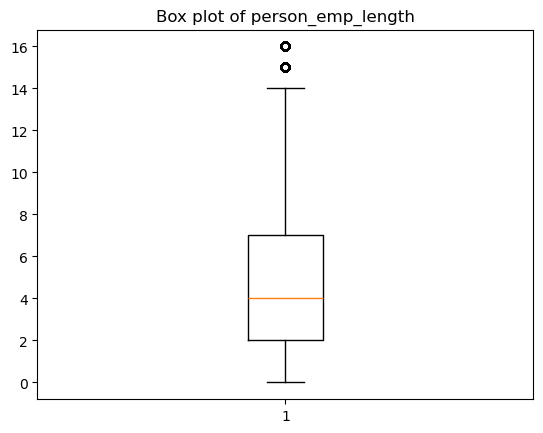

In [575]:
a=["person_age","person_income","person_emp_length"]
for i in a:
    plt.boxplot(data_cleaned[i])
    plt.title(f'Box plot of {i}')
    plt.show()


In [576]:
data_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31489.000000,31489.000000,31489.000000,31489.000000,31489.000000,31489.000000,31489.000000,31489.000000
mean,27.247737,62282.423894,4.563900,9479.432500,11.000872,0.219473,0.171721,5.529201
std,5.355124,33833.120036,3.569489,6200.516988,3.075038,0.413896,0.106653,3.599184
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38200.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,49.000000,224000.000000,16.000000,35000.000000,23.220000,1.000000,0.830000,17.000000


In [577]:
data_cleaned['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    25965
Y     5524
Name: count, dtype: int64

Machine learning

In [578]:
data_cleaned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


Convert categorical into Numerical

In [579]:
data_cleaned["loan_grade"]=pd.Categorical(data_cleaned["loan_grade"]).codes
data_cleaned["person_home_ownership"]=pd.Categorical(data_cleaned["person_home_ownership"]).codes
data_cleaned["loan_intent"]=pd.Categorical(data_cleaned["loan_intent"]).codes
data_cleaned["cb_person_default_on_file"]=pd.Categorical(data_cleaned["cb_person_default_on_file"]).codes


In [591]:
X = data_cleaned.drop(columns = ['cb_person_default_on_file'])
y = data_cleaned['cb_person_default_on_file']

In [581]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000,0,11.0,0,0,4000,6.62,0,0.04,15
32292,38,200000,0,0.0,0,0,3000,7.68,0,0.01,12
32293,38,110000,0,5.0,3,1,16000,11.99,0,0.15,13
32295,42,101000,0,6.0,0,5,25000,16.15,1,0.25,14


In [582]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31489 entries, 1 to 32296
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31489 non-null  int64  
 1   person_income               31489 non-null  int64  
 2   person_home_ownership       31489 non-null  int8   
 3   person_emp_length           31489 non-null  float64
 4   loan_intent                 31489 non-null  int8   
 5   loan_grade                  31489 non-null  int8   
 6   loan_amnt                   31489 non-null  int64  
 7   loan_int_rate               31489 non-null  float64
 8   loan_status                 31489 non-null  int64  
 9   loan_percent_income         31489 non-null  float64
 10  cb_person_cred_hist_length  31489 non-null  int64  
dtypes: float64(3), int64(5), int8(3)
memory usage: 2.3 MB


In [583]:
X["loan_grade"].unique()

array([1, 2, 0, 3, 4, 5, 6], dtype=int8)

Convert into Standard Scalar

In [584]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [585]:
X_scaled

array([[-1.16670255, -1.55715052,  0.21493469, ..., -0.53027015,
        -0.67248132, -0.98057147],
       [-0.4197425 , -1.55715052, -1.18241817, ...,  1.88583123,
         3.73438949, -0.70272627],
       [-0.79322252,  0.09510288,  0.91361112, ...,  1.88583123,
         3.35933665, -0.98057147],
       ...,
       [ 2.00787768,  1.41040299, -1.18241817, ..., -0.53027015,
        -0.20366528,  2.07572575],
       [ 2.75483774,  1.14438724, -1.18241817, ...,  1.88583123,
         0.73396681,  2.35357095],
       [ 2.38135771, -0.30392075,  0.91361112, ...,  1.88583123,
         1.10901964,  2.90926135]])

Split Test and Train Dataset

In [586]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

Performance Matrics Method

In [587]:
import numpy as np
def evaluate_model(y_test, y_pred):
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)*100
    Precision = true_positive/(true_positive+false_positive)*100
    Recall = true_positive/(true_positive+false_negative)*100
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(y_test, y_pred)*100
    return Accuracy,Precision,Recall,F1_Score,auc

Hyperparameter Tunning

In [588]:
# Models and their Different Hyperparameter 

models = [
        {"name": "LogisticRegression","estimator": LogisticRegression(),
         "hyperparameters":{"solver": ["newton-cg", "lbfgs", "liblinear"]}},

        {"name": "KNeighborsClassifier","estimator": KNeighborsClassifier(),
         "hyperparameters":{"n_neighbors": range(1,20,2),
                            "weights": ["distance", "uniform"],
                            "algorithm": ["ball_tree", "kd_tree", "brute"],
                            "p": [1,2]}},
    
        {"name": "RandomForestClassifier",
         "estimator": RandomForestClassifier(random_state=1),
         "hyperparameters":{"n_estimators": [4, 6, 9],
                            "criterion": ["entropy", "gini"],
                            "max_depth": [2, 5, 10],
                            "max_features": ["log2", "sqrt"],
                            "min_samples_leaf": [1, 5, 8],"min_samples_split": [2, 3, 5]}},

        {"name": "DecisionTreeClassifier",
        "estimator": DecisionTreeClassifier(),
        "hyperparameters":{"criterion": ["entropy", "gini"],
                            "max_depth": [2, 5, 10],
                            "max_features": ["log2", "sqrt"],
                            "min_samples_leaf": [1, 5, 8],
                            "min_samples_split": [2, 3, 5]}},
                            
        {"name": "MLPClassifier",
        "estimator":MLPClassifier(),
        "hyperparameters":{"hidden_layer_sizes":[(8,8), (64,64),(128,128)]}}  
]



In [589]:
for model in models:            
    print(model["name"])
    print("-"*len(model["name"]))
    search = GridSearchCV(model["estimator"], 
                          param_grid = model["hyperparameters"],cv =10)
    search.fit(x_train,y_train)
    print(search.best_score_)
    print(search.best_params_)
    print("")


LogisticRegression
------------------
0.8249071580556324
{'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
0.8341802885658532
{'algorithm': 'kd_tree', 'n_neighbors': 17, 'p': 2, 'weights': 'distance'}

RandomForestClassifier
----------------------
0.8316812757119735
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 9}

DecisionTreeClassifier
----------------------
0.8336721728081322
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 3}

MLPClassifier
-------------


c:\Users\HMHSM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HMHSM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HMHSM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HMHSM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HMHSM\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

0.8313006013253041
{'hidden_layer_sizes': (8, 8)}



In [590]:
## Train multiple models

models={
    'KNeighborsClassifier': KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 17, p= 2, weights= 'distance'),
    'RandomForestClassifier':RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'log2', min_samples_leaf= 8, min_samples_split= 2, n_estimators= 9),
    'LogisticRegression':LogisticRegression(solver= "newton-cg"),
    'DecisionTreeClassifier':DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes= (8, 8))
}
trained_model_list=[]
model_list=[]
F1_Score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    #Make Predictions
    y_pred=model.predict(x_test)

    Accuracy,Precision,Recall,F1_Score,auc=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy:",Accuracy)
    print("Precision:",Precision)
    print("Recall",Recall)
    print("F1_Score:",F1_Score)
    print("auc",auc)



    F1_Score_list.append(F1_Score)
    
    print('='*35)
    print('\n')


KNeighborsClassifier
Model Training Performance
Accuracy: 82.8273847326305
Precision: 91.07417666974453
Recall 88.46038863976084
F1_Score: 89.74825599029421
auc 67.464361062145


RandomForestClassifier
Model Training Performance
Accuracy: 83.05601422583513
Precision: 89.24284395198524
Recall 90.13055641902393
F1_Score: 89.68450355706776
auc 71.53051288508352


LogisticRegression
Model Training Performance
Accuracy: 82.67496507049408
Precision: 93.18251769775316
Recall 86.79759174311926
F1_Score: 89.87679976250556
auc 63.10034975796748


DecisionTreeClassifier
Model Training Performance
Accuracy: 83.37355518861933
Precision: 89.21206525084642
Recall 90.50741608118658
F1_Score: 89.85507246376812
auc 72.4969417163323


MLPClassifier
Model Training Performance
Accuracy: 82.48444049282358
Precision: 89.76608187134502
Recall 89.09424163739116
F1_Score: 89.42889996167112
auc 68.91940457203614




The best model is DecisionTreeClassifier with AUC/ROC score 72%. We consider AUC/ROC score because data is imbalanced.